# Dataset Preparation

In [1]:
# load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# set style matplotlib
plt.style.use('ggplot')

In [3]:
# read dataset 
data = pd.read_csv("5_6123006669686311020.csv", sep = ";")

In [4]:
# overview dataset
data.head()

,tanggal,harga
0,01/01/2020,9920
1,02/01/2020,9920
2,03/01/2020,9920
3,04/01/2020,9920
4,05/01/2020,9920


In [9]:
# assign "tanggal" as datetime
data['tanggal '] = pd.to_datetime(data['tanggal '])

In [21]:
# correct datetime order on dataset
data = data[['tanggal ', 'harga']].sort_values(by = "tanggal ").reset_index().drop('index', axis = 1)

In [22]:
# overview information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   1155 non-null   datetime64[ns]
 1   harga     1155 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.2 KB


In [23]:
# overview statistics aspect of dataset
data.describe()

,harga
count,1155.000000
mean,10118.744589
std,208.358027
min,9800.000000
25%,9920.000000
50%,10120.000000
75%,10220.000000
max,11100.000000


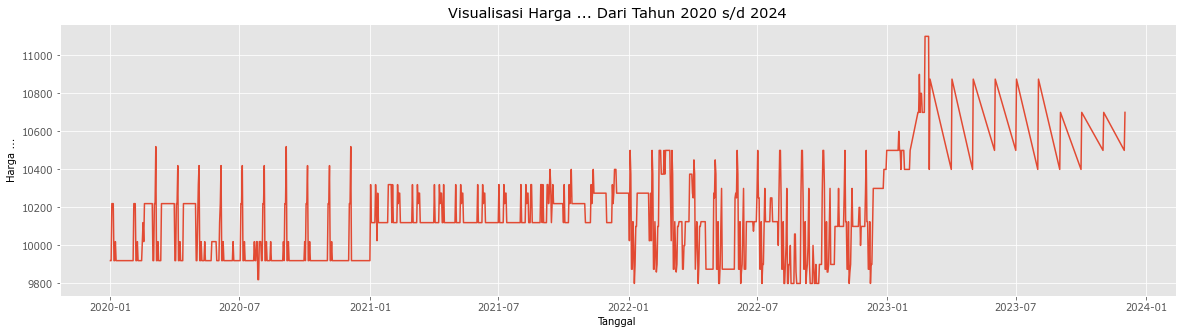

In [29]:
# visualize raw price data
plt.figure(figsize = (20, 5))
plt.plot(data['tanggal '], data['harga'])
plt.ylabel("Harga ...")
plt.xlabel("Tanggal")
plt.title("Visualisasi Harga ... Dari Tahun 2020 s/d 2024");

In [30]:
# scale "price" column using MinMaxScaler
scaler = MinMaxScaler()
data['harga_normalize'] = scaler.fit_transform(data[['harga']])

In [46]:
# feature engineering on "tanggal" column
data['tahun'] = data['tanggal '].apply(lambda x: x.year)
data['bulan'] = data['tanggal '].apply(lambda x: x.month)
data['hari']  = data['tanggal '].apply(lambda x: x.day)

In [47]:
# define feature and target
feature = data[['tahun', 'bulan', 'hari']].values
target  = data[['harga_normalize']].values

In [48]:
# split dataset with ratio train:test - 80:20
ratio_train = 0.8
train_size = int(len(data) * ratio_train)
X_train, X_val = feature[:train_size], feature[train_size:]
y_train, y_val = target[:train_size], target[train_size:]

# Training Model

In [56]:
# load libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
# define model neural network
def build_model():
    model = Sequential()
    model.add(Dense(32, activation = "relu", input_shape = (3,)))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

In [85]:
# inherit model 
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                128       
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [86]:
# training model
history = model.fit(
    X_train, y_train, 
    epochs = 100, 
    batch_size = 1, 
    validation_data = (X_val, y_val), 
    callbacks = [EarlyStopping(monitor = "val_loss", patience = 5)]
)

Epoch 1/100
924/924 [==============================] - 8s 8ms/step - loss: 9494.3711 - val_loss: 12.8087
Epoch 2/100
924/924 [==============================] - 7s 7ms/step - loss: 8.2692 - val_loss: 6.1855
Epoch 3/100
924/924 [==============================] - 6s 7ms/step - loss: 4.0050 - val_loss: 5.7033
Epoch 4/100
924/924 [==============================] - 6s 7ms/step - loss: 1.4200 - val_loss: 0.6693
Epoch 5/100
924/924 [==============================] - 7s 8ms/step - loss: 0.3516 - val_loss: 0.1699
Epoch 6/100
924/924 [==============================] - 7s 7ms/step - loss: 0.0774 - val_loss: 0.0484
Epoch 7/100
924/924 [==============================] - 7s 8ms/step - loss: 0.0438 - val_loss: 0.0787
Epoch 8/100
924/924 [==============================] - 6s 7ms/step - loss: 0.0659 - val_loss: 0.0568
Epoch 9/100
924/924 [==============================] - 7s 8ms/step - loss: 0.0801 - val_loss: 0.0868
Epoch 10/100
924/924 [==============================] - 7s 7ms/step - loss: 0.2352 - va

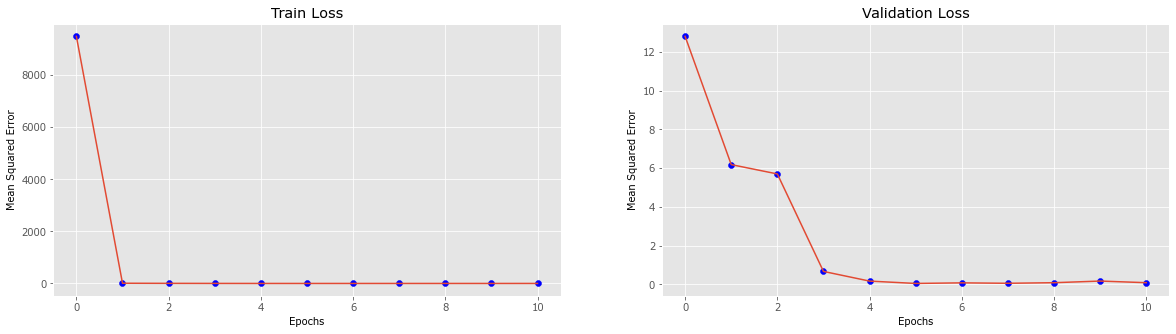

In [87]:
# visualize metrics of training & evaluation model
x = list(range(history.history['loss'].__len__()))
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

ax[0].plot(x, history.history['loss'])
ax[0].scatter(x, history.history['loss'], color = "blue")
ax[0].set_title("Train Loss")
ax[0].set_ylabel("Mean Squared Error")
ax[0].set_xlabel("Epochs")

ax[1].plot(x, history.history['val_loss'])
ax[1].scatter(x, history.history['val_loss'], color = "blue")
ax[1].set_title("Validation Loss")
ax[1].set_ylabel("Mean Squared Error")
ax[1].set_xlabel("Epochs")

plt.show()

In [88]:
# evaluate model
trainScore = model.evaluate(X_train, y_train, verbose = 0)
print("Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, np.sqrt(trainScore)))

Train Score: 0.12 MSE (0.35 RMSE)


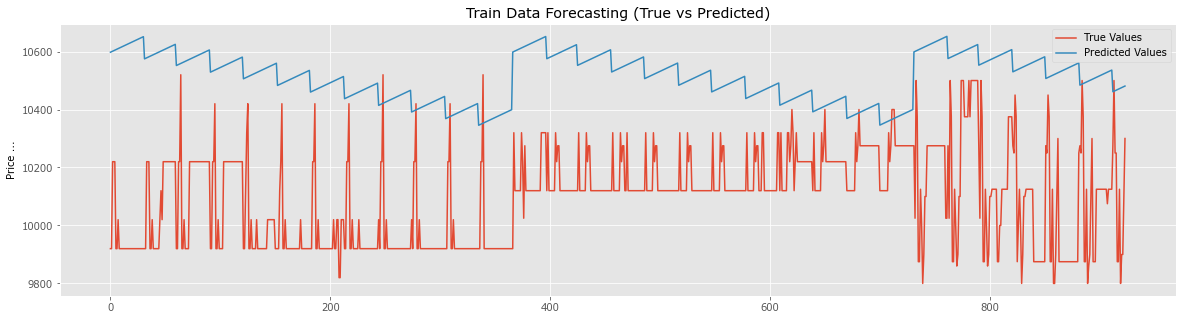

In [89]:
# visualize prediction on train set
plt.figure(figsize = (20, 5))

train_preds = model.predict(X_train, verbose = 0)
train_preds_inv = scaler.inverse_transform(train_preds)
y_train_inv = scaler.inverse_transform(y_train)

plt.plot(y_train_inv, label = "True Values")
plt.plot(train_preds_inv, label = "Predicted Values")
plt.title("Train Data Forecasting (True vs Predicted)")
plt.legend()
plt.ylabel("Price ...")

plt.show()

In [90]:
# evaluate model
valScore = model.evaluate(X_val, y_val, verbose = 0)
print("Validation Score: %.2f MSE (%.2f RMSE)" % (valScore, np.sqrt(valScore)))

Validation Score: 0.09 MSE (0.30 RMSE)


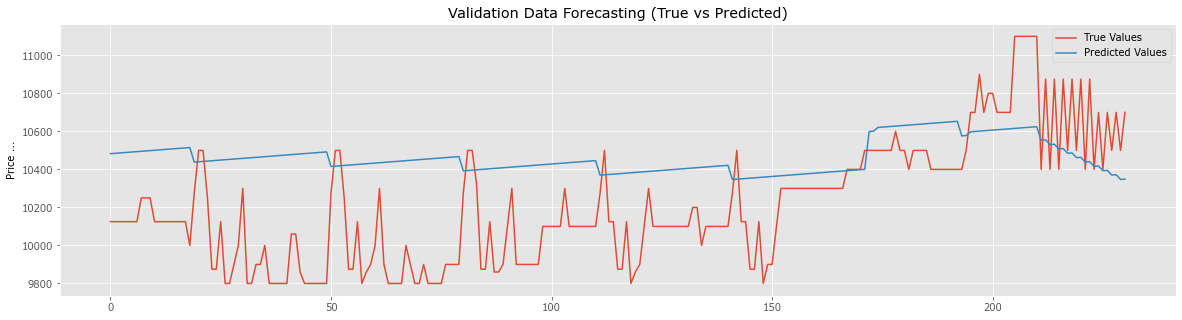

In [91]:
# visualize prediction on train set
plt.figure(figsize = (20, 5))

val_preds = model.predict(X_val, verbose = 0)
val_preds_inv = scaler.inverse_transform(val_preds)
y_val_inv = scaler.inverse_transform(y_val)

plt.plot(y_val_inv, label = "True Values")
plt.plot(val_preds_inv, label = "Predicted Values")
plt.title("Validation Data Forecasting (True vs Predicted)")
plt.legend()
plt.ylabel("Price ...")

plt.show()

# Forecast Model

In [105]:
# load libraries
import datetime

## Original Dataset

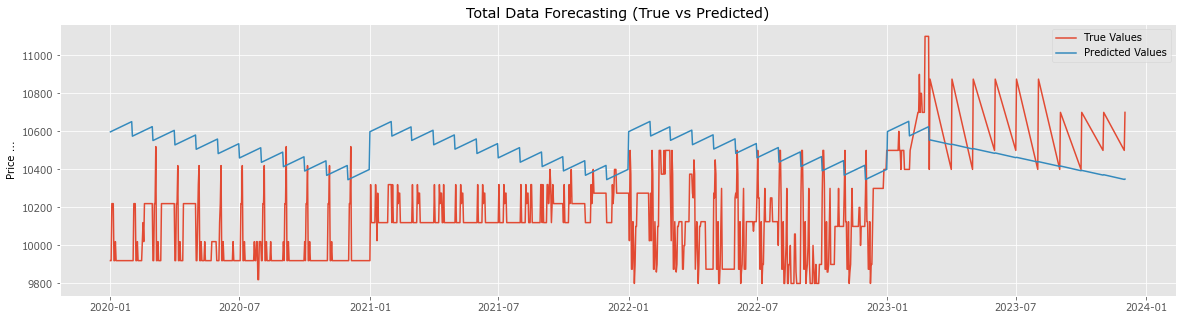

In [103]:
# visualize prediction on total dataset
plt.figure(figsize = (20, 5))


total_preds = model.predict(feature, verbose = 0)
total_preds_inv = scaler.inverse_transform(total_preds)
y_total_inv = data['harga'].values

plt.plot(data['tanggal '], y_total_inv, label = "True Values")
plt.plot(data['tanggal '], total_preds_inv, label = "Predicted Values")
plt.title("Total Data Forecasting (True vs Predicted)")
plt.legend()
plt.ylabel("Price ...")

plt.show()

In [101]:
# put predicted values on dataset
data['harga_predict'] = sum(scaler.inverse_transform(model.predict(feature, verbose = 0)).tolist(), [])

In [102]:
# overview dataset
data.head()

,tanggal,harga,harga_normalize,tahun,bulan,hari,harga_predict
0,2020-01-01,9920,0.092308,2020,1,1,10597.626953
1,2020-01-02,9920,0.092308,2020,1,2,10599.431641
2,2020-01-03,10220,0.323077,2020,1,3,10601.216797
3,2020-01-04,10220,0.323077,2020,1,4,10602.982422
4,2020-01-05,10220,0.323077,2020,1,5,10604.787109


In [104]:
# overview tail dataset
data.tail()

,tanggal,harga,harga_normalize,tahun,bulan,hari,harga_predict
1150,2023-10-02,10700,0.692308,2023,10,2,10394.918945
1151,2023-11-01,10500,0.538462,2023,11,1,10370.202148
1152,2023-11-02,10700,0.692308,2023,11,2,10371.988281
1153,2023-12-01,10500,0.538462,2023,12,1,10347.311523
1154,2023-12-02,10700,0.692308,2023,12,2,10349.056641


In [122]:
# save dataset
data.to_excel("final-dataset.xlsx", index=False)

## Generated Dataset

In [112]:
# create "simulation timestamp"
n_days = 100
fake_data = pd.DataFrame({
    "tanggal " : pd.date_range(data['tanggal '].tail(1).values[0], periods = n_days).tolist(),
})

In [114]:
# feature engineering on "tanggal" column
fake_data['tahun'] = fake_data['tanggal '].apply(lambda x: x.year)
fake_data['bulan'] = fake_data['tanggal '].apply(lambda x: x.month)
fake_data['hari']  = fake_data['tanggal '].apply(lambda x: x.day)

In [115]:
# overview fake_data
fake_data.head()

,tanggal,tahun,bulan,hari
0,2023-12-02,2023,12,2
1,2023-12-03,2023,12,3
2,2023-12-04,2023,12,4
3,2023-12-05,2023,12,5
4,2023-12-06,2023,12,6


In [118]:
# define feature variable used for prediction model
feature_fake = fake_data[['tahun', 'bulan', 'hari']].values

# get estimation price based on 100th days forward
fake_data['harga'] = sum(scaler.inverse_transform(model.predict(feature_fake, verbose = 0)).tolist(), [])

In [119]:
# overview fake_data
fake_data.head()

,tanggal,tahun,bulan,hari,harga
0,2023-12-02,2023,12,2,10349.056641
1,2023-12-03,2023,12,3,10350.921875
2,2023-12-04,2023,12,4,10352.707031
3,2023-12-05,2023,12,5,10354.492188
4,2023-12-06,2023,12,6,10356.277344


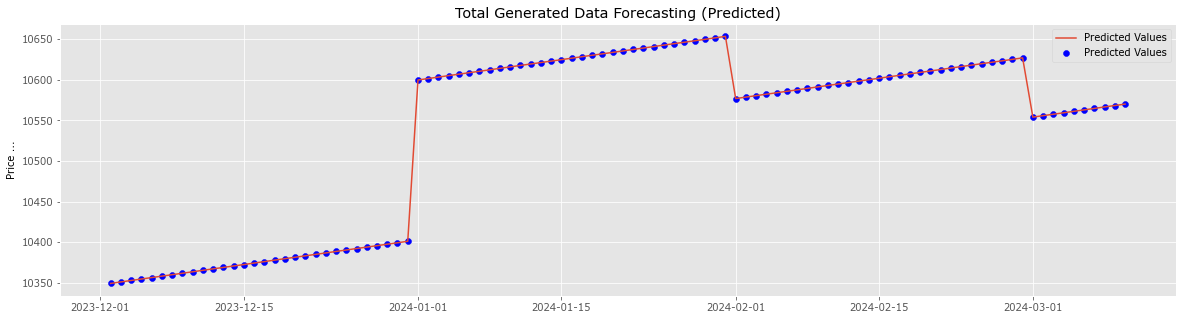

In [121]:
# visualize prediction on total fake_data
plt.figure(figsize = (20, 5))

plt.plot(fake_data['tanggal '], fake_data['harga'], label = "Predicted Values")
plt.scatter(fake_data['tanggal '], fake_data['harga'], color = "blue", label = "Predicted Values")
plt.title("Total Generated Data Forecasting (Predicted)")
plt.legend()
plt.ylabel("Price ...")

plt.show()

In [123]:
# save dataset
fake_data.to_excel("fake-dataset.xlsx", index=False)

## Concat Version of Dataset

In [126]:
# combine dataset
combine_data = pd.concat([
    data[['tanggal ', 'harga']], 
    fake_data[['tanggal ', 'harga']]
]).reset_index().drop("index", axis = 1)

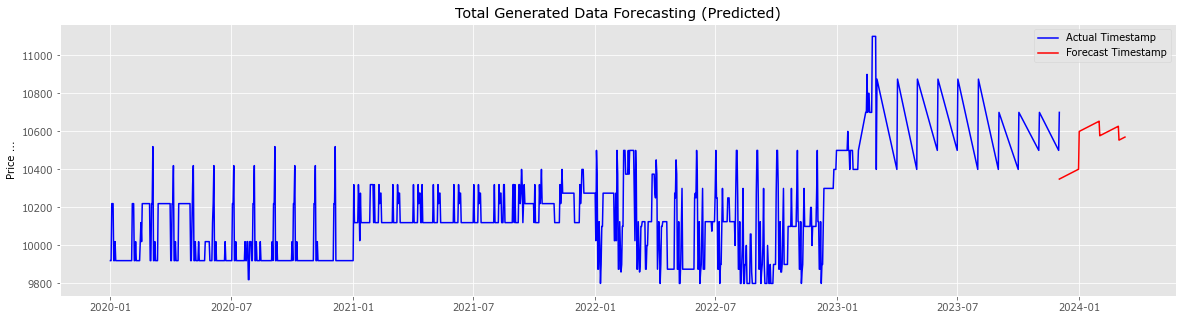

In [129]:
# visualize prediction on total fake_data
plt.figure(figsize = (20, 5))

plt.plot(combine_data['tanggal '].values[:1155], combine_data['harga'].values[:1155], color = "blue", label = "Actual Timestamp")
plt.plot(combine_data['tanggal '].values[1155:], combine_data['harga'].values[1155:], color = "red", label = "Forecast Timestamp")
plt.title("Total Generated Data Forecasting (Predicted)")
plt.legend()
plt.ylabel("Price ...")

plt.show()

## Custom Data

In [130]:
# define ur own timestmap
hari, bulan, tahun = 1, 3, 2023

In [131]:
# create "simulation timestamp"
n_days = 100
fake_data = pd.DataFrame({
    "tanggal " : pd.date_range(datetime.datetime(year = tahun, month = bulan, day = hari), periods = n_days).tolist(),
})

In [132]:
# feature engineering on "tanggal" column
fake_data['tahun'] = fake_data['tanggal '].apply(lambda x: x.year)
fake_data['bulan'] = fake_data['tanggal '].apply(lambda x: x.month)
fake_data['hari']  = fake_data['tanggal '].apply(lambda x: x.day)

In [133]:
# overview fake_data
fake_data.head()

,tanggal,tahun,bulan,hari
0,2023-03-01,2023,3,1
1,2023-03-02,2023,3,2
2,2023-03-03,2023,3,3
3,2023-03-04,2023,3,4
4,2023-03-05,2023,3,5


In [134]:
# define feature variable used for prediction model
feature_fake = fake_data[['tahun', 'bulan', 'hari']].values

# get estimation price based on 100th days forward
fake_data['harga'] = sum(scaler.inverse_transform(model.predict(feature_fake, verbose = 0)).tolist(), [])

In [135]:
# overview fake_data
fake_data.head()

,tanggal,tahun,bulan,hari,harga
0,2023-03-01,2023,3,1,10553.470703
1,2023-03-02,2023,3,2,10555.255859
2,2023-03-03,2023,3,3,10557.041016
3,2023-03-04,2023,3,4,10558.866211
4,2023-03-05,2023,3,5,10560.670898


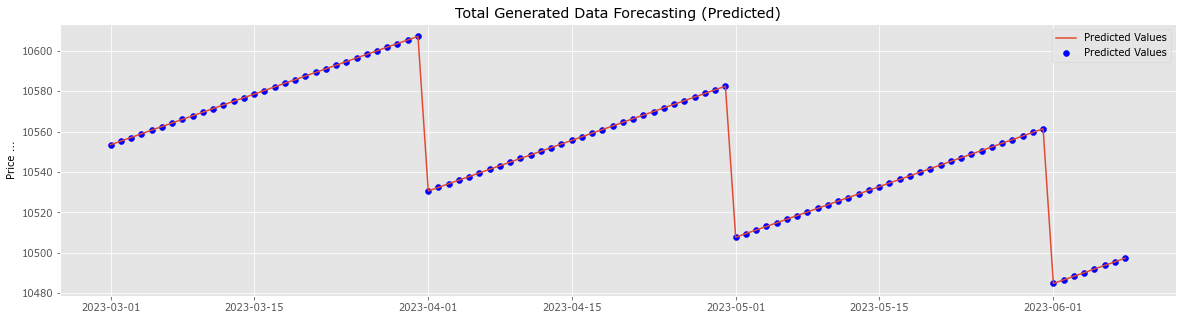

In [136]:
# visualize prediction on total fake_data
plt.figure(figsize = (20, 5))

plt.plot(fake_data['tanggal '], fake_data['harga'], label = "Predicted Values")
plt.scatter(fake_data['tanggal '], fake_data['harga'], color = "blue", label = "Predicted Values")
plt.title("Total Generated Data Forecasting (Predicted)")
plt.legend()
plt.ylabel("Price ...")

plt.show()

In [137]:
# save dataset
fake_data.to_excel("fake-dataset-march-2023.xlsx", index=False)